# 拉氏变换求常微分方程(组)的符号解

# 使用拉普拉斯变换求解常微分方程(组)的符号解

## 基本概念
拉普拉斯变换定义为：
$$
\mathcal{L}\{f(t)\} = F(s) = \int_0^\infty e^{-st}f(t)dt
$$

## 单方程求解步骤

### 1. 微分性质
$$
\mathcal{L}\{f'(t)\} = sF(s) - f(0) \\
\mathcal{L}\{f''(t)\} = s^2F(s) - sf(0) - f'(0)
$$

### 2. 求解流程
1. 对方程两边取拉氏变换
2. 代入初始条件
3. 解代数方程得$Y(s)$
4. 求逆变换$y(t) = \mathcal{L}^{-1}\{Y(s)\}$

### 示例：二阶方程
**方程**:
$$
y'' + 3y' + 2y = e^{-t}, \quad y(0)=1, y'(0)=0
$$

**求解过程**:
1. 变换后方程:
   $$(s^2Y - s) + 3(sY - 1) + 2Y = \frac{1}{s+1}$$
2. 整理得:
   $$(s^2 + 3s + 2)Y = s + 3 + \frac{1}{s+1}$$
3. 解出:
   $$Y(s) = \frac{1}{s+1} + \frac{1}{s+2} - \frac{1}{(s+1)^2}$$
4. 逆变换:
   $$y(t) = e^{-t} + e^{-2t} - te^{-t}$$

## 方程组求解步骤

### 1. 求解流程
1. 对每个方程取拉氏变换
2. 建立代数方程组
3. 解方程组得$X(s), Y(s)$
4. 分别求逆变换

### 示例：耦合方程组
**方程组**:
$$
\begin{cases}
x' = 2x + y \\
y' = x + 2y 
\end{cases}, \quad x(0)=1, y(0)=0
$$

**求解过程**:
1. 变换后:
   $$\begin{cases}
   sX - 1 = 2X + Y \\
   sY = X + 2Y 
   \end{cases}$$
2. 矩阵形式:
   $$\begin{pmatrix}
   s-2 & -1 \\
   -1 & s-2
   \end{pmatrix}
   \begin{pmatrix}
   X \\ Y
   \end{pmatrix} = 
   \begin{pmatrix}
   1 \\ 0
   \end{pmatrix}$$
3. 解得:
   $$X(s) = \frac{1/2}{s-1} + \frac{1/2}{s-3}$$
   $$Y(s) = \frac{-1/2}{s-1} + \frac{1/2}{s-3}$$
4. 逆变换:
   $$x(t) = \frac{1}{2}e^t + \frac{1}{2}e^{3t}$$
   $$y(t) = -\frac{1}{2}e^t + \frac{1}{2}e^{3t}$$

## 常用拉氏变换对
| 原函数 $f(t)$ | 象函数 $F(s)$ |
|:-------------:|:-------------:|
| $1$           | $\frac{1}{s}$ |
| $e^{at}$      | $\frac{1}{s-a}$ |
| $t^n$         | $\frac{n!}{s^{n+1}}$ |
| $\sin(at)$    | $\frac{a}{s^2+a^2}$ |
| $\cos(at)$    | $\frac{s}{s^2+a^2}$ |

## 注意事项
1. 仅适用于线性系统
2. 初始条件必须在$t=0$处给出
3. 非齐次项需有已知拉氏变换
4. 逆变换时可能需要：
   - 部分分式分解
   - 留数定理
   - 卷积定理

### 1.利用拉氏变换解初值问题

$y^{(4)}+2y''+y = 4te^t$

$y(0) = y'(0) = y''(0) = y^{(3)}(0) = 0$

In [15]:
import sympy as sp

t = sp.symbols('t',positive=True)  #并指定其属性为正数
s = sp.symbols('s')
Y = sp.Function('Y')

g = 4*t*sp.exp(t)
Lg = sp.laplace_transform(g,t,s)  #方程右端项的拉氏变换

d = s**4*Y(s)+2*s**2*Y(s)+Y(s)
de = d-Lg[0]  #定义取拉氏变换后的代数方程

Ys = sp.solve(de,Y(s))[0]  #求像函数Y(s)
# print(Ys)
Ys = sp.factor(Ys)  #将多项式或有理函数分解为不可约因式的乘积。
# print(Ys)
yt = sp.inverse_laplace_transform(Ys,s,t)  #计算像函数 Y(s) 的拉普拉斯逆变换，从而得到原函数 y(t)
print('y(t)=', yt)
yt = yt.rewrite(sp.exp)  #将表达式中的 三角函数、双曲函数或其他特殊函数 转换为 指数函数（exponential）形式。这种转换通常用于简化表达式，或使其更适合后续的数值计算或分析。
# print(yt)
yt = yt.as_real_imag()  #将一个复数表达式 分解为其实部和虚部，返回一个元组 (real_part, imag_part)。这在处理包含复数的符号表达式时非常有用，尤其是在需要分离实部和虚部的情况下（例如，分析振荡系统或信号处理）。real_part 是表达式的实部。imag_part 是表达式的虚部。
print('y(t)=', yt)
yt = sp.simplify(yt[0])
print('y(t)=', yt)

y(t)= t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t)
y(t)= (t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t), 0)
y(t)= t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t)


### 2.解方程组

$2x'' = -6x+2y$

$y'' = 2x-2y+40sin3t$

初值条件为:
$x(0)=x'(0) = y(0) = y'(0) = 0$

x(t)= 5*sin(t) - 4*sin(2*t) + sin(3*t)
y(t)= 10*sin(t) + 4*sin(2*t) - 6*sin(3*t)


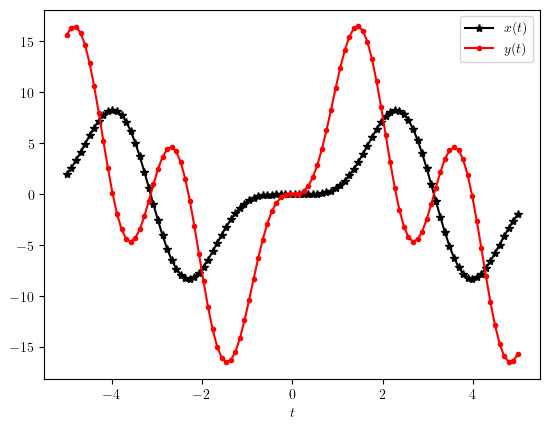

In [8]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

t = sp.var('t', positive=True); s = sp.var('s')
X,Y = sp.var('X Y', cls=sp.Function)

g = 40*sp.sin(3*t)
Lg = sp.laplace_transform(g,t,s)

eq1 = 2*s**2*X(s)+6*X(s)-2*Y(s)
eq2 = s**2*Y(s)-2*X(s)+2*Y(s)-Lg[0]
eq = [eq1, eq2]  #定义取拉式变换后的代数方程组

XYs = sp.solve(eq,(X(s),Y(s)))
Xs = XYs[X(s)]; Ys = XYs[Y(s)]
Xs = sp.factor(Xs); Ys = sp.factor(Ys)
xt = sp.inverse_laplace_transform(Xs,s,t)
yt = sp.inverse_laplace_transform(Ys,s,t)
print('x(t)=', xt); print('y(t)=', yt)

fx = sp.lambdify(t,xt,'numpy')  #转换为匿名函数
fy = sp.lambdify(t,yt,'numpy')
t = np.linspace(-5,5,100)
plt.rc('text',usetex=True)
plt.plot(t,fx(t),'*-k',label='$x(t)$')
plt.plot(t,fy(t),'.-r',label='$y(t)$')
plt.xlabel('$t$')
plt.legend()
plt.show()